### REACT : Reasoning and Action.

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [13]:
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [14]:
model = "deepseek-r1-distill-llama-70b"

In [15]:
from langchain_groq import ChatGroq

In [16]:
llm  = ChatGroq(model_name = model)

In [18]:
llm.invoke("Hi")

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [20]:
import operator
from typing import List
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from pydantic import BaseModel , Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END


In [21]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [24]:
state = {"messages" : ["Hi hello how are you?"]}

In [ ]:
call_model(state)

In [26]:
workflow = StateGraph(MessagesState)

In [27]:
workflow.add_node("mybot", call_model)

In [28]:
workflow.add_edge(START, "mybot")

In [29]:
workflow.add_edge("mybot", END)

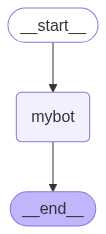

In [33]:
app = workflow.compile()
app

In [31]:
input = {"message" : ["Hi Hello How are you?"]}

In [32]:
app.invoke(input)

AuthenticationError: Error code: 401 - {'error': {'message': 'Invalid API Key', 'type': 'invalid_request_error', 'code': 'invalid_api_key'}}

In [35]:
@tool
def search(query:str):
    """
    This is my custom tool for searching weather
    """
    if "delhi" in query.lower():
        return "The tempearture is 45 degree and Sunny"
    return "The temperature is 25 degree and Cloudy"

In [36]:
search.invoke("What is temperature in Kashmir?")

'The temperature is 25 degree and Cloudy'

In [37]:
search

StructuredTool(name='search', description='This is my custom tool for searching weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x1108696c0>)

In [38]:
tools = [search]

In [39]:
llm_with_tool = llm.bind_tools(tools)

In [ ]:
response = llm_with_tool.invoke("What is a weather in Delhi?")

In [ ]:
response.tool_calls

In [ ]:
response.content

In [46]:
def call_model(state : MessagesState):
    question = state["messages"]
    response = llm_with_tool.invoke(question)
    return {"messages" : [response] }


In [47]:
input = {"messages" : ["What is the weather in Delhi?"]}

In [ ]:
response = call_model(input)

In [ ]:
response["messages"][-1].tool_calls

In [ ]:
def router_function(state:MessagesState):
    message = state["messages"]
    last_message = message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [ ]:
workflow2.add_node("llm_with_tool", call_model)
